In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("../week6/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [6]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


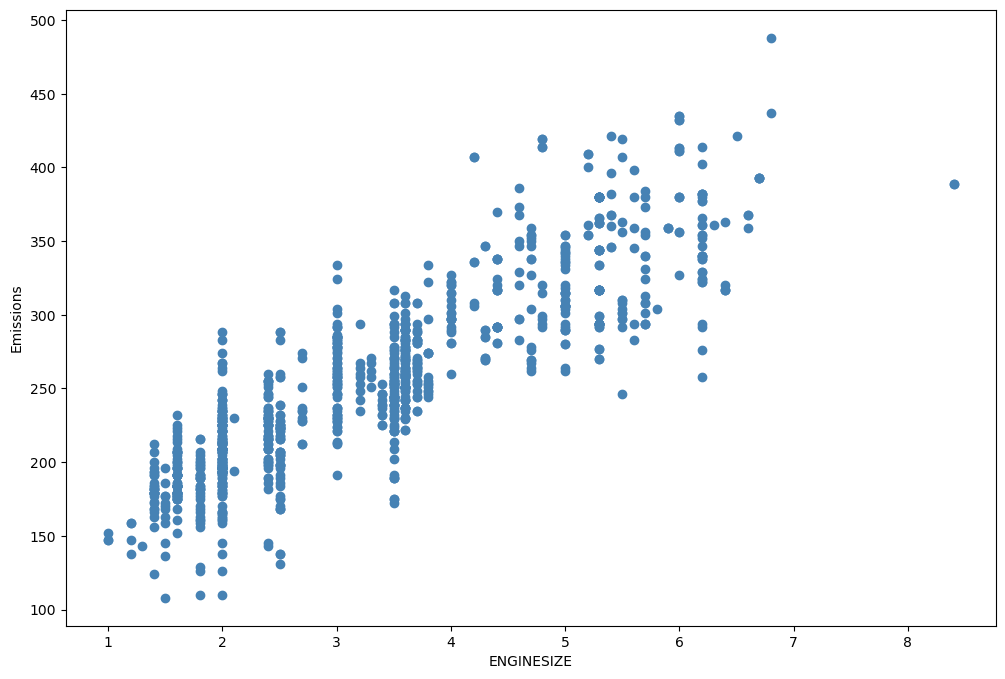

In [7]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [9]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [10]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    3.5  12.25]
 [ 1.    1.6   2.56]
 ...
 [ 1.    3.6  12.96]
 [ 1.    5.3  28.09]
 [ 1.    2.    4.  ]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [11]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [12]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         49.61616735 -1.41294074]]
Intercept: [108.94174114]


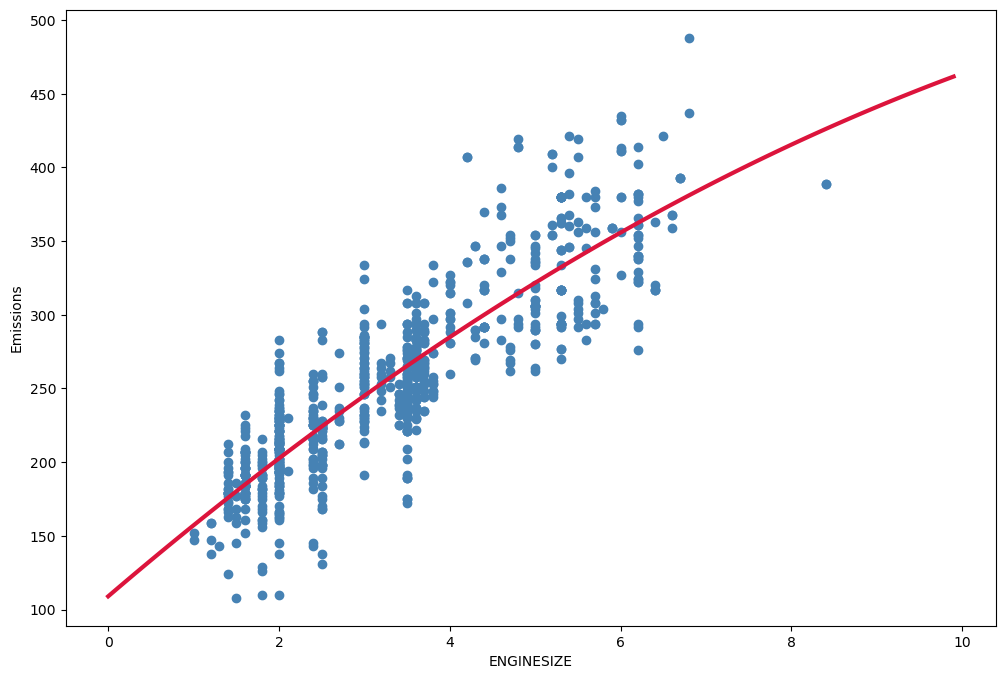

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [14]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[108.94174114 113.88922847 118.80845698 123.69942668 128.56213756
 133.39658963 138.20278288 142.98071732 147.73039295 152.45180975
 157.14496775 161.80986693 166.44650729 171.05488884 175.63501158
 180.1868755  184.7104806  189.20582689 193.67291437 198.11174303
 202.52231287 206.9046239  211.25867612 215.58446952 219.88200411
 224.15127988 228.39229683 232.60505498 236.7895543  240.94579481
 245.07377651 249.17349939 253.24496346 257.28816872 261.30311515
 265.28980278 269.24823158 273.17840158 277.08031276 280.95396512
 284.79935867 288.6164934  292.40536932 296.16598643 299.89834472

# Evaluation

In [15]:

#Tuba Akbaş
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelin tahmin ettiği değerler
predicted_y = clf.predict(train_x_poly)

# MAE hesapla
mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MAE: ", mae)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y)
print("r²: ", r2)

MAE:  23.633420682881336
MAE:  23.633420682881336
RMSE:  30.971307152937154
r²:  0.7610156082919735


In [16]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 22.05
Mean Squared Error (MSE): 845.32
R2-Score: 0.79


# Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [17]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)

In [18]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[  1.      2.      4.      8.   ]
 [  1.      3.5    12.25   42.875]
 [  1.      1.6     2.56    4.096]
 ...
 [  1.      3.6    12.96   46.656]
 [  1.      5.3    28.09  148.877]
 [  1.      2.      4.      8.   ]]


In [19]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [20]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         27.66857527  4.61430865 -0.49721695]]
Intercept: [132.29838832]


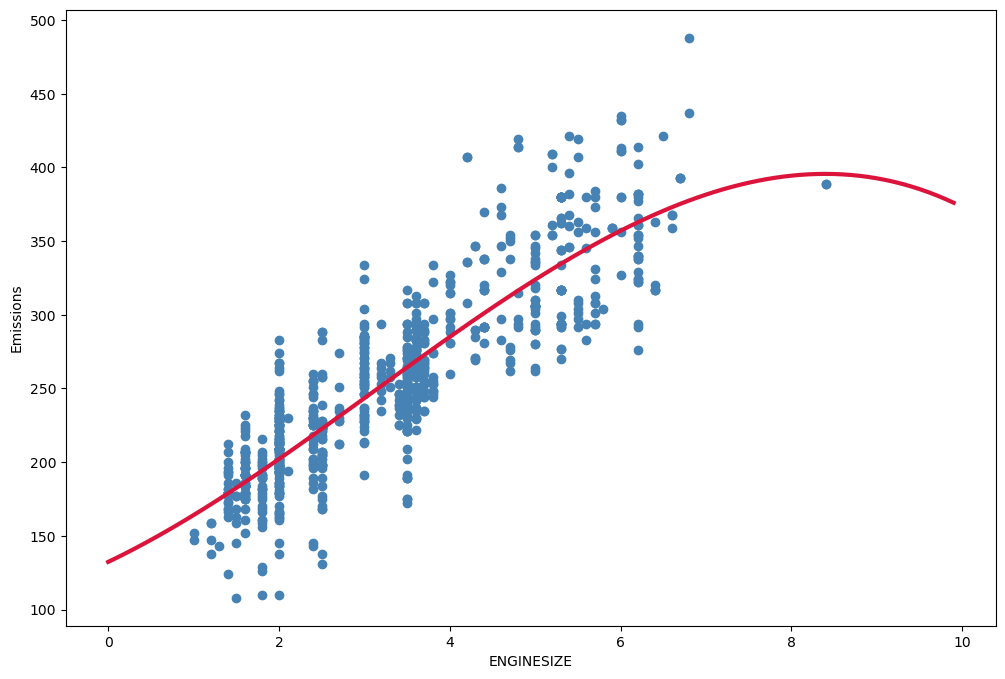

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [22]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[132.29838832 135.11089172 138.01269799 141.00082383 144.07228593
 147.224101   150.45328574 153.75685684 157.131831   160.57522492
 164.08405529 167.65533883 171.28609222 174.97333216 178.71407535
 182.50533849 186.34413828 190.22749141 194.15241459 198.11592451
 202.11503788 206.14677138 210.20814172 214.2961656  218.40785971
 222.54024075 226.69032542 230.85513042 235.03167245 239.21696821
 243.40803439 247.60188769 251.79554482 255.98602246 260.17033732
 264.34550609 268.50854548 272.65647219 276.7863029  280.89505432
 284.97974315 289.03738608 293.06499982 297.05960106 301.0182065


In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 22.02
Mean Squared Error (MSE): 844.41
R2-Score: 0.79
